In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [20]:
dataset=pd.read_csv(r'D:\21MIS1117\Naive Bayes Classifier\iris.csv')
dataset.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

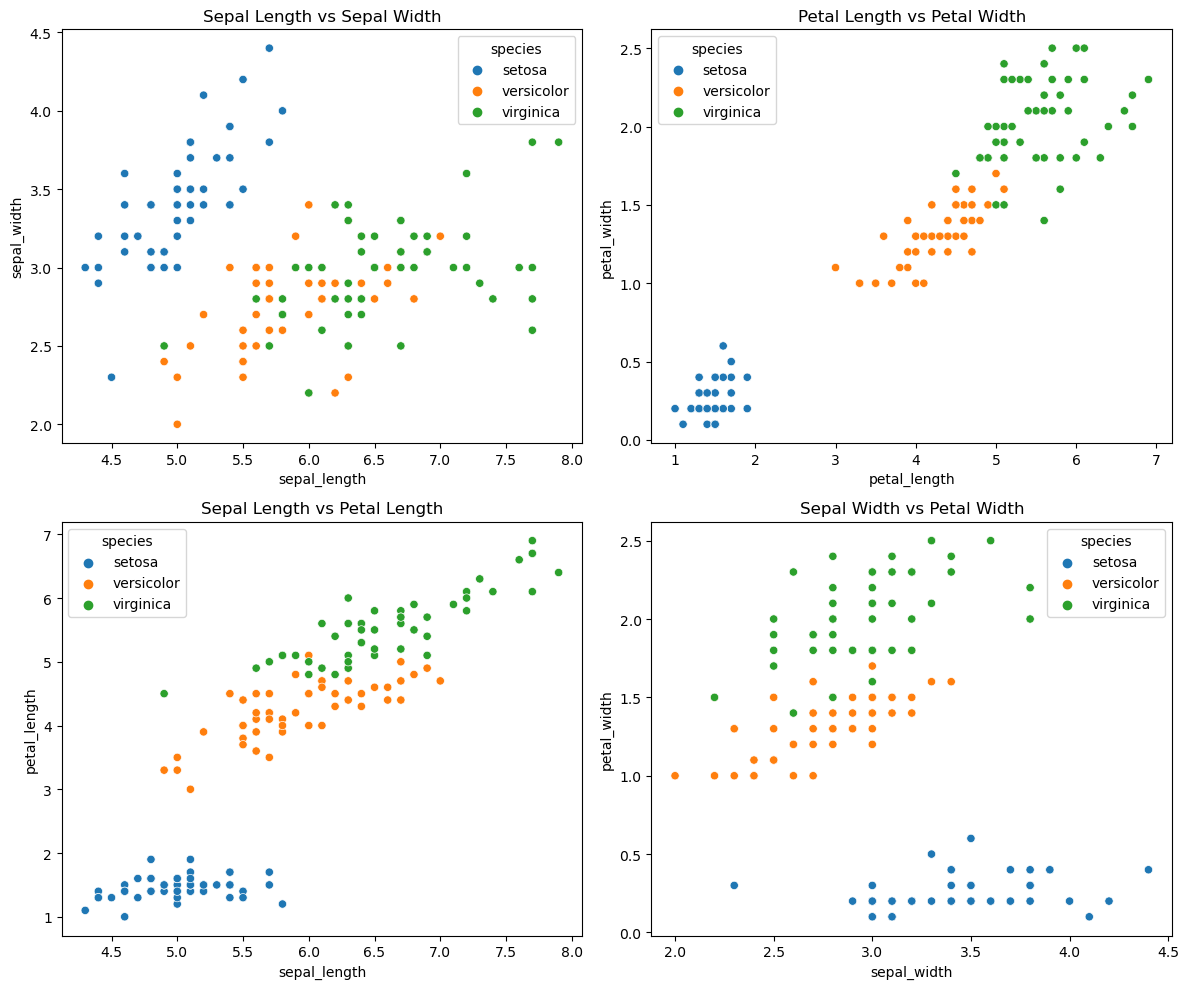

In [40]:
# Scatter plots for feature pairs
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Sepal Length vs Sepal Width')

sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Petal Length vs Petal Width')

sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Sepal Length vs Petal Length')

sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Sepal Width vs Petal Width')

plt.tight_layout()
plt.show()


In [21]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [23]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [26]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa']], dtype=object)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


<Axes: >

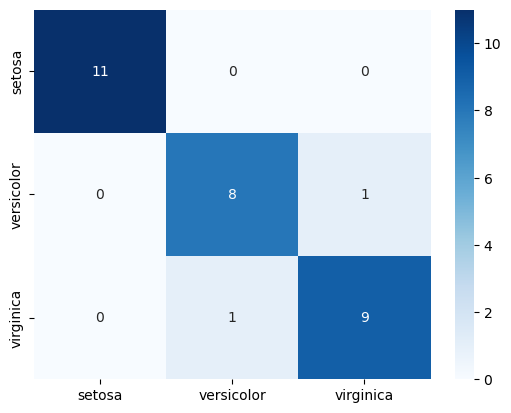

In [44]:
class_names = np.unique(y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

In [28]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))            


Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


In [29]:
new_observation = np.array([[5.6, 3.5, 1.6, 0.1]]) #Sample(X)
new_observation_scaled = sc.transform(new_observation)
predicted_species = nvclassifier.predict(new_observation_scaled)
print(f"The predicted species for sepal_length=5.6, sepal_width=3.5, petal_length=1.6, petal_width=0.1 is: {predicted_species[0]}")

The predicted species for sepal_length=5.6, sepal_width=3.5, petal_length=1.6, petal_width=0.1 is: setosa
